In [2]:
from ultralytics import YOLO

# Load a model
#model = YOLO('yolov8n-seg.pt')  # load an official model
model = YOLO('/Users/edwardamoah/Documents/GitHub/FloralArea/runs/segment/train3/weights/best.pt')  # load a custom model

In [3]:
# Predict with the model
results = model('/Users/edwardamoah/Downloads/FA photos/IMG_7399.jpeg')  # predict on an image


image 1/1 /Users/edwardamoah/Downloads/FA photos/IMG_7399.jpeg: 640x480 248 flowers, 252.3ms
Speed: 4.6ms preprocess, 252.3ms inference, 69.8ms postprocess per image at shape (1, 3, 640, 480)


In [5]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'flower'}
 obb: None
 orig_img: array([[[108, 165, 162],
         [105, 162, 159],
         [ 90, 149, 145],
         ...,
         [ 45,  86,  71],
         [ 44,  85,  70],
         [ 47,  88,  73]],
 
        [[ 93, 150, 147],
         [ 88, 147, 143],
         [ 75, 136, 132],
         ...,
         [ 47,  88,  73],
         [ 50,  91,  76],
         [ 54,  95,  80]],
 
        [[ 52, 109, 106],
         [ 45, 102,  99],
         [ 55, 114, 110],
         ...,
         [ 51,  92,  77],
         [ 54,  95,  80],
         [ 57,  98,  83]],
 
        ...,
 
        [[ 55,  89,  88],
         [ 57,  91,  90],
         [ 46,  80,  79],
         ...,
         [105, 168, 166],
         [103, 166, 164],
         [101, 164, 162]],
 
        [[ 56,  90,  89],
         [ 59,  93,  92],
         [ 47,  81,  80

In [14]:
results[0].masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

TypeError: Invalid shape (248, 640, 480) for image data

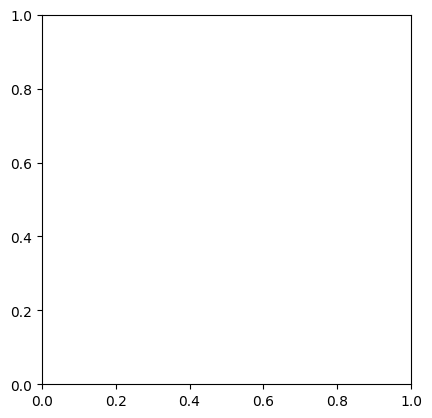

In [15]:
import matplotlib.pyplot as plt

# Assuming your tensor is named 'tensor'
plt.imshow(results[0].masks.data)
plt.axis('off')
plt.show()


In [17]:
type(results[0].masks.data)

torch.Tensor

TypeError: Invalid shape (248, 640, 480) for image data

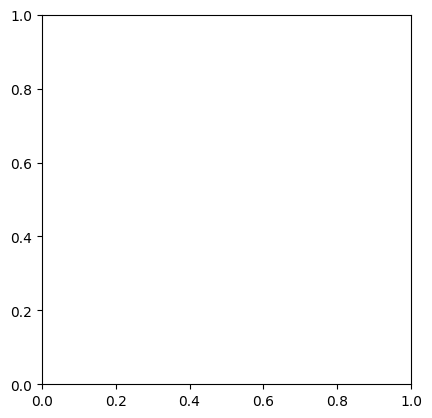

In [18]:
import matplotlib.pyplot as plt
tensor = results[0].masks.data
# Assuming your tensor is named 'tensor'
plt.imshow(tensor.numpy())
plt.axis('off')
plt.show()


In [22]:
results[0].boxes.numpy()

ultralytics.engine.results.Boxes object with attributes:

cls: array([          0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,       

In [24]:
for r in results:
    print(r.masks)

AttributeError: 'Masks' object has no attribute 'xy'. See valid attributes below.

    A class for storing and manipulating detection masks.

    Attributes:
        xy (list): A list of segments in pixel coordinates.
        xyn (list): A list of normalized segments.

    Methods:
        cpu(): Returns the masks tensor on CPU memory.
        numpy(): Returns the masks tensor as a numpy array.
        cuda(): Returns the masks tensor on GPU memory.
        to(device, dtype): Returns the masks tensor with the specified device and dtype.
    

In [26]:
from PIL import Image


In [27]:
# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results.jpg')  # save image

In [28]:
#### code to generate mask from the results of the model ####

In [ ]:
from ultralytics import YOLO
import os

# Load a model
model = YOLO('/Users/edwardamoah/Documents/GitHub/FloralArea/runs/segment/train3/weights/best.pt')  # load a custom model

def main(folder, save_folder):
    images = os.listdir(folder)
    images_paths = [os.path.join(folder, image) for image in images]

    # run the model on each image
    for image in images_paths:
        print(f'Processing {image}')
        results = model(image) # predict on an image
        
        # generate and save prediction mask
        for r in results:
            im_array = r.plot()  # plot a BGR numpy array of predictions
            im = Image.fromarray(im_array[..., ::-1])
            im.save(f'{save_folder}/{image}_mask.jpg')